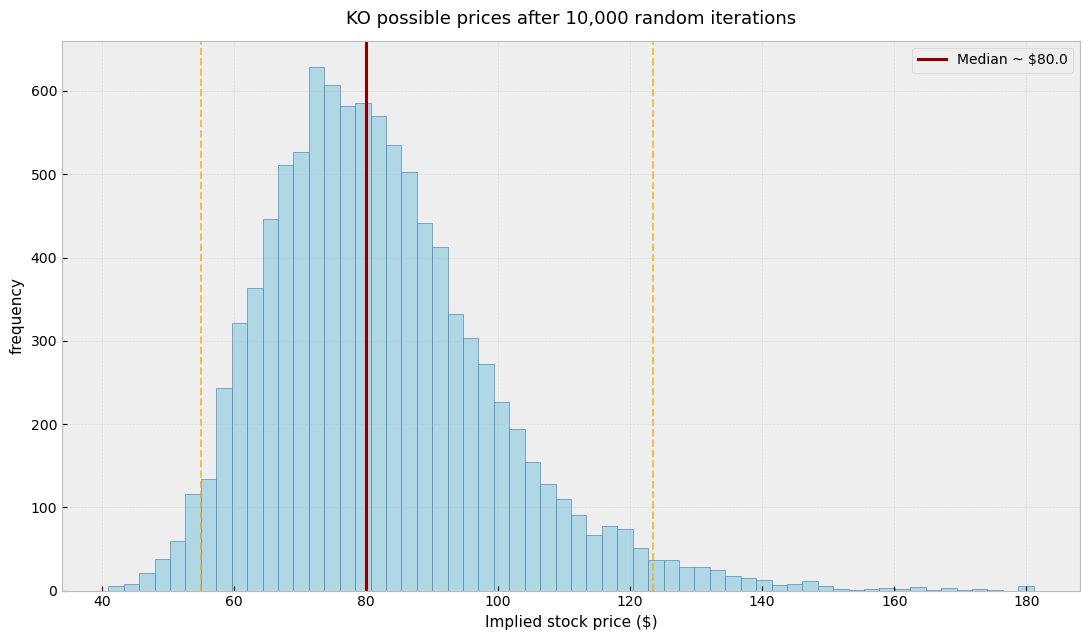

                 Median: $79.95
  Rough 95% range ≈   $55  –  $123
   (Done)


In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# ok let's value KO the lazy way with monte carlo bc why not
revenue_now = 47061      
cash_on_hand = 14571
total_debt = 49576
shares_out = 4320         
tax = 0.208               # they pay like 20.8% apparently
# assumptions i'm somewhat okay with
growth_next_few_years_mean = 0.05
growth_vol = 0.012       # feels about right for a mega-cap staple
margin_fcf_mean = 0.26
margin_vol = 0.02
wacc_guess = 0.0628      
wacc_vol = 0.005
terminal_growth = 0.025
tg_vol = 0.003
n_sims = 10000
prices = []

for _ in range(n_sims):
    g = np.random.normal(growth_next_few_years_mean, growth_vol)
    fcf_margin = np.random.normal(margin_fcf_mean, margin_vol)
    cost_of_capital = np.random.normal(wacc_guess, wacc_vol)
    perpetuity_g = np.random.normal(terminal_growth, tg_vol)
    # don't let wacc go below g 
    if cost_of_capital <= perpetuity_g:
        cost_of_capital = perpetuity_g + 0.008   # generous estimate
    rev = revenue_now
    pv_fcfs = 0
    for yr in range(1, 5):           # 2025-2028 
        rev = rev * (1 + g)
        fcf = rev * fcf_margin
        pv_fcfs += fcf / (1 + cost_of_capital)**yr
    # terminal value at end of yr4
    fcf_last = rev * (1 + g) * fcf_margin
    tv = fcf_last * (1 + perpetuity_g) / (cost_of_capital - perpetuity_g)
    tv_discounted = tv / (1 + cost_of_capital)**4
    enterprise_value = pv_fcfs + tv_discounted
    equity = enterprise_value + cash_on_hand - total_debt
    price_per_share = equity / shares_out
    prices.append(price_per_share)
# visualization
plt.style.use('bmh')   # looks less corporate
plt.figure(figsize=(11, 6.5))
plt.hist(prices, bins=60, color='#a8d5e3', edgecolor='steelblue', alpha=0.9)

median_price = np.median(prices)
plt.axvline(median_price, color='darkred', lw=2.2, 
            label=f'Median ~ ${median_price:,.1f}')
p025 = np.percentile(prices, 2.5)
p975 = np.percentile(prices, 97.5)
plt.axvline(p025, color='orange', ls='--', lw=1.4, alpha=0.7)
plt.axvline(p975, color='orange', ls='--', lw=1.4, alpha=0.7)

plt.title("KO possible prices after 10,000 random iterations", fontsize=13, pad=12)
plt.xlabel("Implied stock price ($)", fontsize=11), plt.ylabel("frequency", fontsize=11)
plt.legend(), plt.grid(alpha=0.3), plt.tight_layout(), plt.show()

print(f"                 Median: ${median_price:,.2f}")
print(f"  Rough 95% range ≈   ${p025:,.0f}  –  ${p975:,.0f}")
print("   (Done)")